# LatLonProfiles diagnostic - Single line profiles

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.

Specifically, in this notebook we look at the code for example plots of a single zonal profile (along with the reference data).

In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the classes `LatLonProfiles` and `PlotLatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We generate a dictionary, `dataset_dict`, including the data we want to plot in this notebook.
The plot of a reference profile to be plotted along with the input dataset is optional. If chosen, `obs_dict` is necessary. 
Lastly, `common_dict` include the common features for both datasets (input and reference).

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

We hence generate an object of the `LatLonProfiles` class, and we decide to plot a zonal profile as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

The analysed variable for this notebook will be `tprate` (Total Precipitation Rate, expressed in mm/day).

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set it to 'meridional'. We also generate another LatLonProfiles object for the reference zonal profile.

In [4]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict, mean_type='zonal')
lonlat_obs = LatLonProfiles(**obs_dict, **common_dict, mean_type='zonal')

run_dict = {'var': 'tprate',
            'units': 'mm/day'}

lonlat_dataset.run(**run_dict, std=True)
lonlat_obs.run(**run_dict, std=True)

2025-08-17 18:09:26 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-17 18:09:26 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-17 18:09:26 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for tprate
2025-08-17 18:09:26 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!


2025-08-17 18:09:27 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-08-17 18:09:27 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-08-17 18:09:27 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-08-17 18:09:27 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-08-17 18:09:27 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-17 18:09:27 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-08-17 18:09:41 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-08-17 18:09:41 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-08-17 18:09:41 :: Regridder :: INFO     -> Grid name: lon-lat
2025-08-17 18:09:41 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_ICON_historical-1990_lra-r100-monthly.nc.
2025-08-17 18:09:41 :: CoordTransa

Different types of dataset can be managed and plotted via `LatLonProfiles` and `PlotLatLonProfiles`: 
- Seasonal mean, with season choice between DJF, MAM, JJA and SON
- Annual mean

Let us start with a single line plot using a single timestep (with reference)

## Single plot - seasonal mean
We can choose to select a specific season from `lonlat_dataset.seasonal` (which contains [DJF, MAM, JJA, SON]) or use the annual mean from `lonlat_dataset.annual`.

Standard deviation shading implementation is possible (and optional) for both the model and the reference data. In this case, we choose 
to plot the std shading only for the reference data, showing how to possibly implement it for the model data via `std_data`.

The seasonal data is a list with 4 elements:
- Index 0: DJF (December-January-February)  
- Index 1: MAM (March-April-May)
- Index 2: JJA (June-July-August)
- Index 3: SON (September-October-November)

In [5]:
# Seasonal data example:
single_season = lonlat_dataset.seasonal[0]  # DJF (winter)
single_season_obs = lonlat_obs.seasonal[0]  # DJF (winter) for reference

# Annual data example:
# single_annual = lonlat_dataset.annual
# single_annual_obs = lonlat_obs.annual

data_to_use = single_season
ref_data_to_use = single_season_obs

plot_dict = {'data': [data_to_use],  # Note: needs to be a list
             'ref_data': ref_data_to_use,  # Reference data
             #'std_data': lonlat_dataset.std_seasonal[0],  # DJF std for model data
             'ref_std_data': lonlat_obs.std_seasonal[0],  # DJF std for reference data
             'loglevel': 'INFO'}

We here plot the single profile, retrieve the plot labels and info via the metadata. Lastly, we save the plot:

2025-08-17 18:10:35 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 18:10:35 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 18:10:35 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.tprate.png


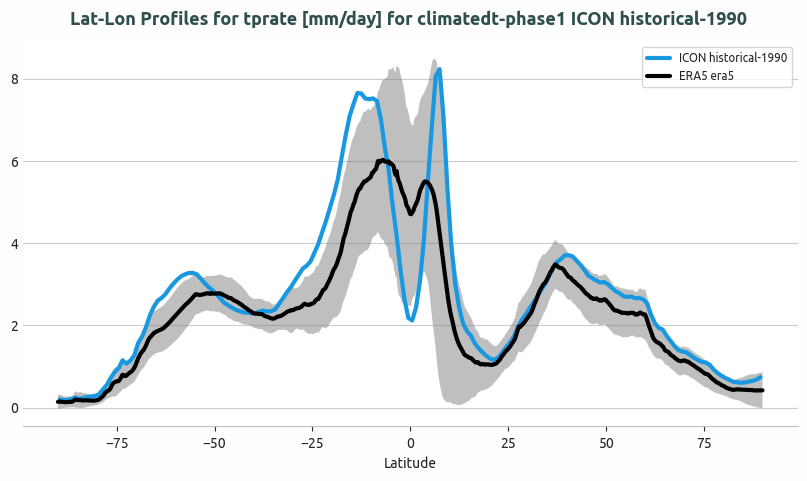

In [6]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)

### Single plot - annual mean profile

Lastly, with the same logic we plot the annual mean for the `lonlat_dataset` object along with the reference data:

2025-08-17 18:10:51 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 18:10:51 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 18:10:51 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual.climatedt-phase1.ICON.historical-1990.r1.tprate.png


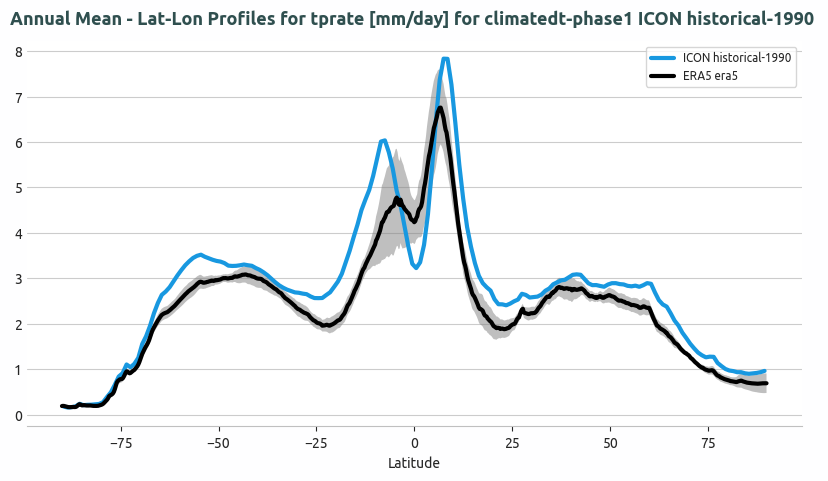

In [ ]:
# Create a separate annual mean plot
annual_plot = PlotLatLonProfiles(
    data=[lonlat_dataset.annual],            # Annual data
    ref_data=lonlat_obs.annual,              # Annual reference data
    #std_data=lonlat_dataset.std_annual,     # Annual std for model data
    ref_std_data=lonlat_obs.std_annual,      # Annual std for reference data
    loglevel='INFO'
)

# Set labels and title for annual plot
annual_data_labels = annual_plot.set_data_labels()
annual_ref_label = annual_plot.set_ref_label()
annual_title = f"Annual Mean - {annual_plot.set_title(var=run_dict['var'], units=run_dict['units'])}"
annual_description = annual_plot.set_description()

# Plot and save annual mean
fig_annual, _ = annual_plot.plot_lat_lon_profiles(
    data_labels=annual_data_labels, 
    ref_label=annual_ref_label, 
    title=annual_title
)
annual_plot.save_plot(
    fig=fig_annual, 
    var=run_dict['var'], 
    description=annual_description,
    diagnostic='lat_lon_profiles_annual'
)

### Seasonal means profiles

Via `PlotLatLonProfiles` we can also show the 4 seasons means represented in four subplots. In case of std shading to be plotted also for model data, `std_data` can be added (hereby commented).

2025-08-17 18:10:52 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-08-17 18:11:42 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 18:11:44 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 18:11:44 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 18:11:44 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


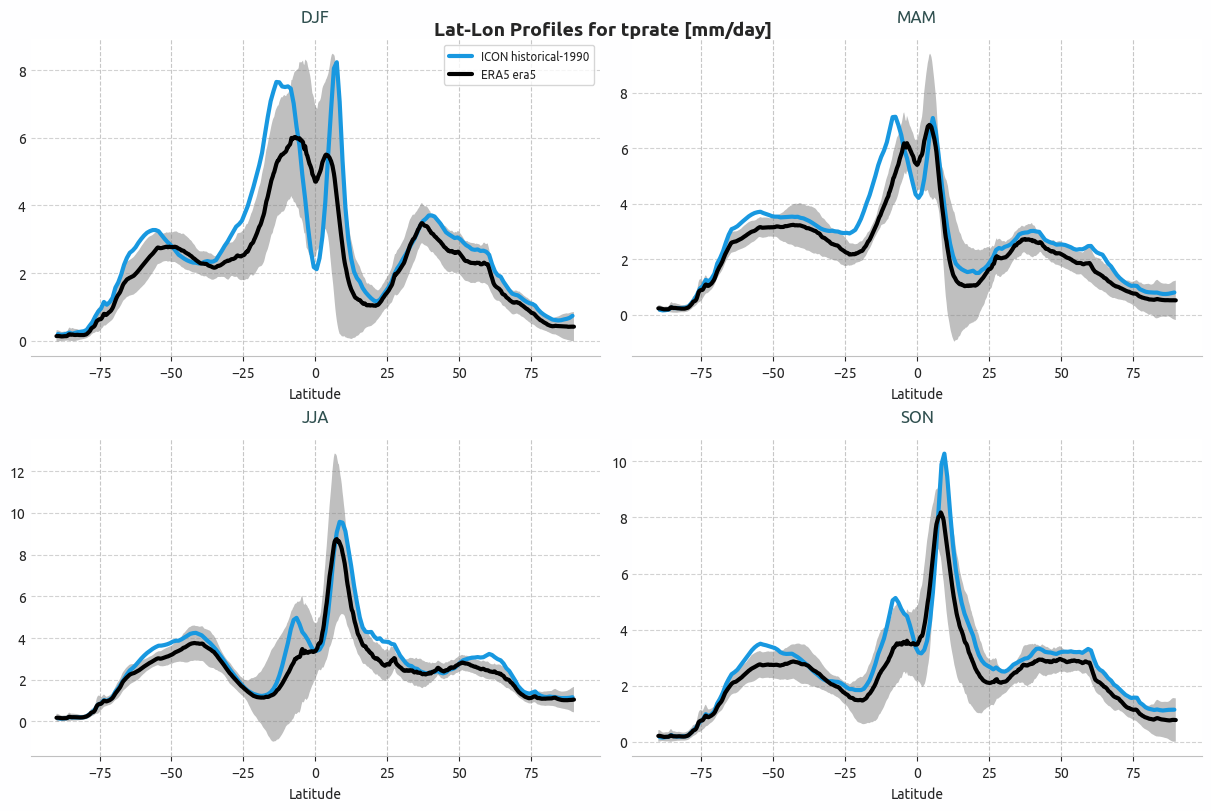

In [8]:
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(4):  # DJF, MAM, JJA, SON
    combined_seasonal_model_data.append([lonlat_dataset.seasonal[i]])  # Model data as list
    combined_seasonal_ref_data.append(lonlat_obs.seasonal[i])          # Reference data

# Prepare std data for all 4 seasons
std_maps = [lonlat_dataset.std_seasonal[i] for i in range(4)]  # DJF, MAM, JJA, SON std
ref_std_maps = [lonlat_obs.std_seasonal[i] for i in range(4)]  # Reference std for all seasons

seasonal_plot = PlotLatLonProfiles(
    seasonal_annual_data=combined_seasonal_model_data, 
    seasonal_annual_ref_data=combined_seasonal_ref_data,
    loglevel='INFO'
)
seasonal_plot.run(
    var=run_dict['var'], 
    units=run_dict['units'], 
    plot_type='seasonal',
    #std_maps=std_maps,
    ref_std_maps=ref_std_maps
)